In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('kmeans.txt',delimiter=' ')

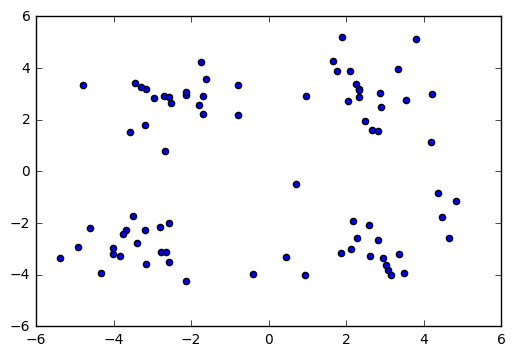

In [3]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [4]:
def euclDistance(vector1, vector2):
    return np.sqrt(sum((vector1-vector2)**2))

def initCentroids(data, k):
    numSamples, dim = data.shape
    # k个质心，列数跟样本的列数一样
    centroids = np.zeros((k, dim))
    # 随机选出k个质心
    for i in range(k):
        # 随机选取一个样本的索引
        index = int(np.random.uniform(0, numSamples))
        # 作为初始化的质心
        centroids[i,:] = data[index,:]
    return centroids

# 传入数据和k值
def kmeans(data, k):
    # 计算样本的个数
    numSamples = data.shape[0]
    # clusterData样本的属性，行是代表各个样本，第一列保存样本属于哪个簇，
    # 第二列保存样本跟它所属簇的距离
    clusterData = np.array(np.zeros((numSamples, 2)))
    # 决定质心是否要改变
    clusterChanged = True
    
    # 初始化质心
    centroids = initCentroids(data, k)
    
    while clusterChanged:
        clusterChanged = False
        # 循环每一个样本
        for i in range(numSamples):
            # 最小距离
            minDist = 100000.0
            # 定义样本所属的簇
            minIndex = 0
            # 循环计算每一个质心和样本的距离
            for j in range(k):
                # 计算距离
                distance = euclDistance(centroids[j,:],data[i,:])
                if distance < minDist:
                    # 更新最小距离
                    minDist = distance
                    # 更新样本所属的簇
                    minIndex = j
                    # 更新样本保存的最小距离
                    clusterData[i,1] = distance
                  
            # 如果样本所属的簇发生改变
            if clusterData[i,0] != minIndex:
                # 质心发生改变
                clusterChanged = True
                # 更新样本的簇
                clusterData[i,0] = minIndex
        
        # 更新质心
        for j in range(k):
            # 获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:,0]==j)
            # 第j个簇所有的样本点
            pointsInCluster = data[cluster_index]
            # 计算质心
            centroids[j,:] = np.mean(pointsInCluster,axis=0)
        
#         showCluster(data, k, centroids, clusterData)
        
    return centroids, clusterData

In [5]:
# 设置k值
k = 4

# centroids簇的中心
# clusterData样本的属性，行是代表各个样本，第一列保存样本属于哪个簇，
# 第二列保存样本跟它所属簇的距离
centroids,clusterData = kmeans(data, k)

In [6]:
centroids

array([[-4.04883533, -2.77633633],
       [-0.02298687,  2.99472915],
       [ 2.8692781 , -2.54779119],
       [-2.38267313, -3.20383625]])

In [7]:
clusterData

array([[ 1.        ,  2.11994793],
       [ 1.        ,  3.45749223],
       [ 2.        ,  2.41369623],
       [ 0.        ,  1.4540836 ],
       [ 1.        ,  0.9980541 ],
       [ 1.        ,  3.83500437],
       [ 2.        ,  2.53359376],
       [ 0.        ,  1.19249474],
       [ 1.        ,  3.03400394],
       [ 1.        ,  3.13964752],
       [ 2.        ,  1.4819551 ],
       [ 3.        ,  0.41745057],
       [ 1.        ,  4.23118523],
       [ 1.        ,  2.10097807],
       [ 2.        ,  2.99424023],
       [ 3.        ,  2.13042379],
       [ 1.        ,  3.18864688],
       [ 1.        ,  0.84257746],
       [ 2.        ,  0.81267988],
       [ 0.        ,  0.98488356],
       [ 1.        ,  2.36246237],
       [ 1.        ,  1.81754107],
       [ 2.        ,  0.93442591],
       [ 0.        ,  0.64547128],
       [ 1.        ,  2.0072814 ],
       [ 1.        ,  1.83243647],
       [ 2.        ,  0.56551684],
       [ 0.        ,  0.43273179],
       [ 1.        ,

In [8]:
# 显示结果
def showCluster(data, k, centroids, clusterData):
    numSamples, dim = data.shape
    if dim !=2 :
        print("dimension of your data is not 2!")
        return 1
    # 用不同颜色形状来表示各个类别
    mark = ['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    # 画样本点
    for i in range(numSamples):
        # 获取样本点的类别
        markIndex = int(clusterData[i,0])
        plt.plot(data[i,0],data[i,1],mark[markIndex])
    
    # 画质心
    mark = ['*r','*b','*g','*k','^r','+r','sr','dr','<r','pr']
    for i in range(k):
        plt.plot(centroids[i,0], centroids[i,1], mark[i], markersize = 20)
    plt.show()

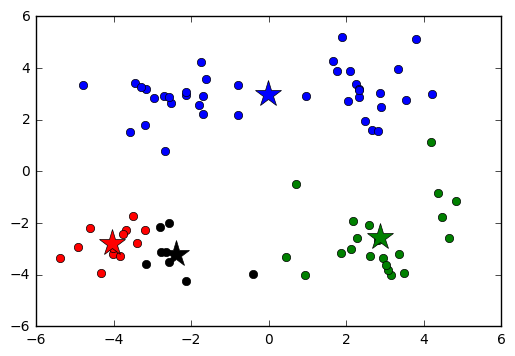

In [9]:
showCluster(data, k, centroids, clusterData)

# 做预测

In [10]:
x_test = [0,1]

In [11]:
np.tile(x_test,(k,1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [12]:
np.tile(x_test,(k,1)) - centroids

array([[ 4.04883533,  3.77633633],
       [ 0.02298687, -1.99472915],
       [-2.8692781 ,  3.54779119],
       [ 2.38267313,  4.20383625]])

In [13]:
(np.tile(x_test,(k,1)) - centroids)**2

array([[  1.63930676e+01,   1.42607161e+01],
       [  5.28396275e-04,   3.97894440e+00],
       [  8.23275679e+00,   1.25868223e+01],
       [  5.67713122e+00,   1.76722392e+01]])

In [14]:
((np.tile(x_test,(k,1)) - centroids)**2).sum(axis=1)

array([ 30.65378366,   3.97947279,  20.81957912,  23.34937044])

In [15]:
np.sqrt(((np.tile(x_test,(k,1)) - centroids)**2).sum(axis=1))

array([ 5.53658592,  1.9948616 ,  4.5628477 ,  4.83211863])

In [16]:
np.argmin(np.sqrt(((np.tile(x_test,(k,1)) - centroids)**2).sum(axis=1)))

1

In [17]:
def predict(datas):
    return np.array([np.argmin(np.sqrt(((np.tile(data,(k,1)) - centroids)**2).sum(axis=1))) for data in datas])

# 画出每个簇的区域

C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


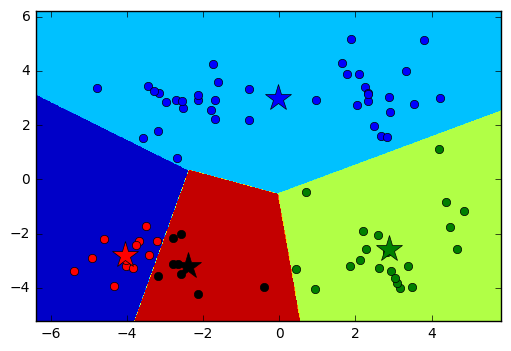

In [18]:
# 获取数据值所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)

showCluster(data, k, centroids, clusterData)

In [19]:
predict(data)

array([1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 0, 1, 1, 2,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 3, 1, 1, 2, 0, 1, 1, 2, 3, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1,
       1, 2, 0, 2, 1, 2, 3, 1, 1, 2, 0], dtype=int64)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


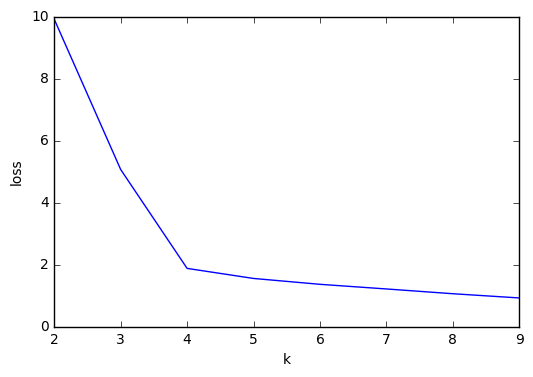

In [24]:

list_loss = []

for k in range(2,10):
    min_loss = 10000
    min_loss_centroids = np.array([])
    min_loss_clusterData = np.array([])
    for i in range(50):
        # centroids簇的中心
        # clusterData样本的属性，行是代表各个样本，第一列保存样本属于哪个簇，
        # 第二列保存样本跟它所属簇的距离
        centroids,clusterData = kmeans(data, k)
        loss = sum((clusterData[:,1])**2)/data.shape[0]
        if loss < min_loss:
            min_loss = loss
            min_loss_centroids = centroids
            min_loss_clusterData = clusterData
    list_loss.append(min_loss)
        
plt.plot(range(2,10),list_loss)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()